<a href="https://colab.research.google.com/github/RayapureddiRoshini/FMML-LAB-1/blob/RayapureddiRoshini/FMML_Module4_Lab3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

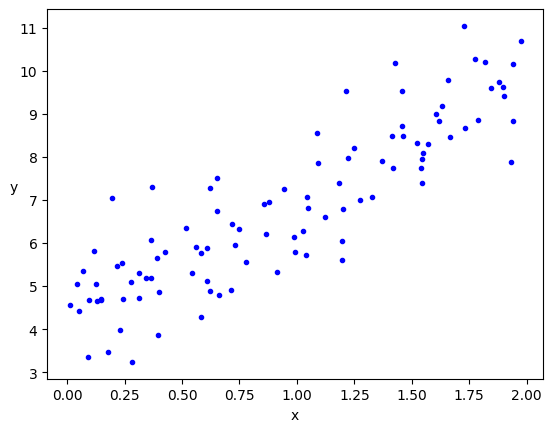

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [5]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [6]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [7]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

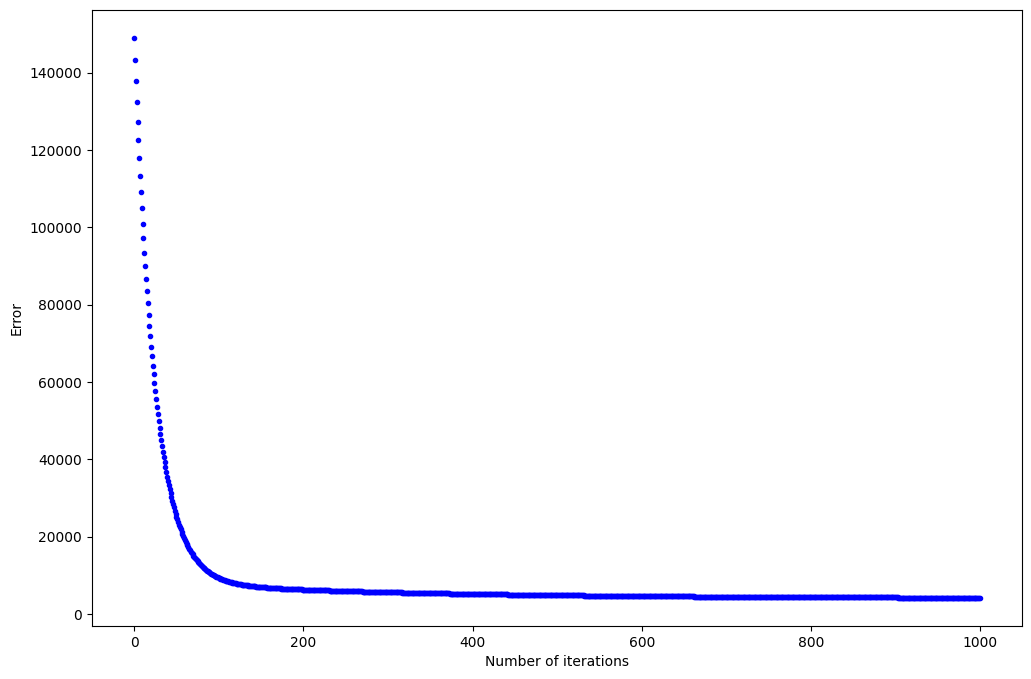

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

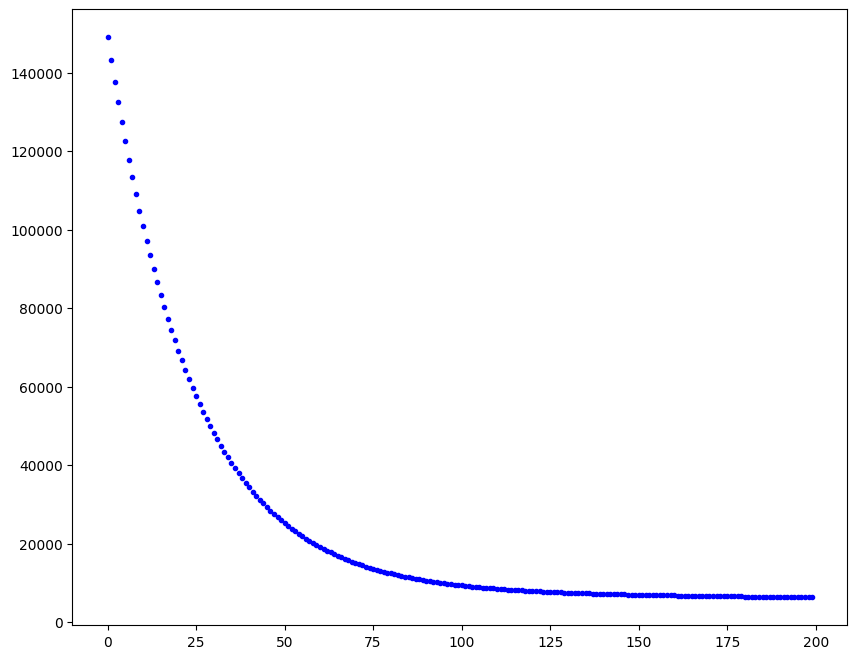

In [9]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [10]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [11]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


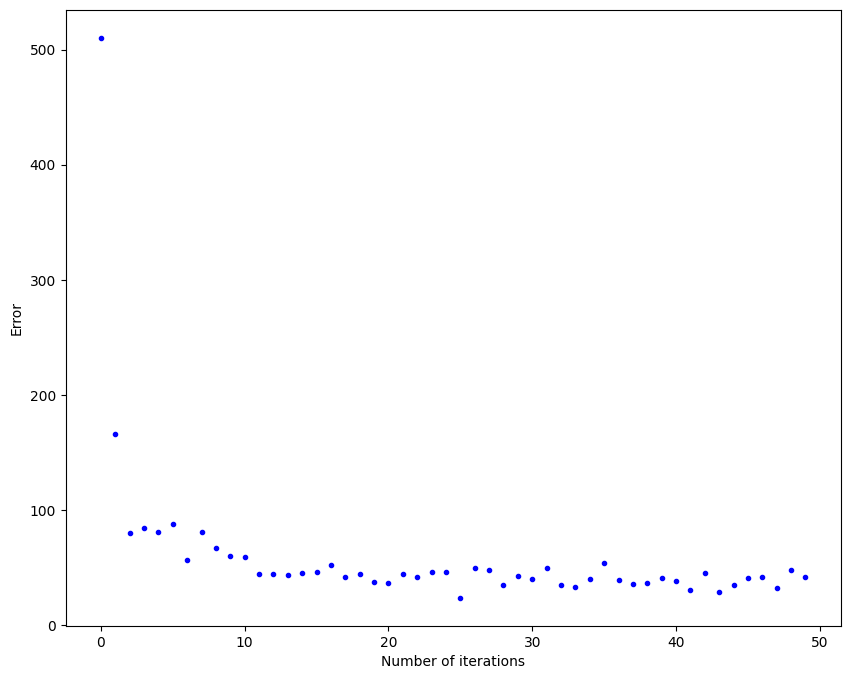

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [13]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [14]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


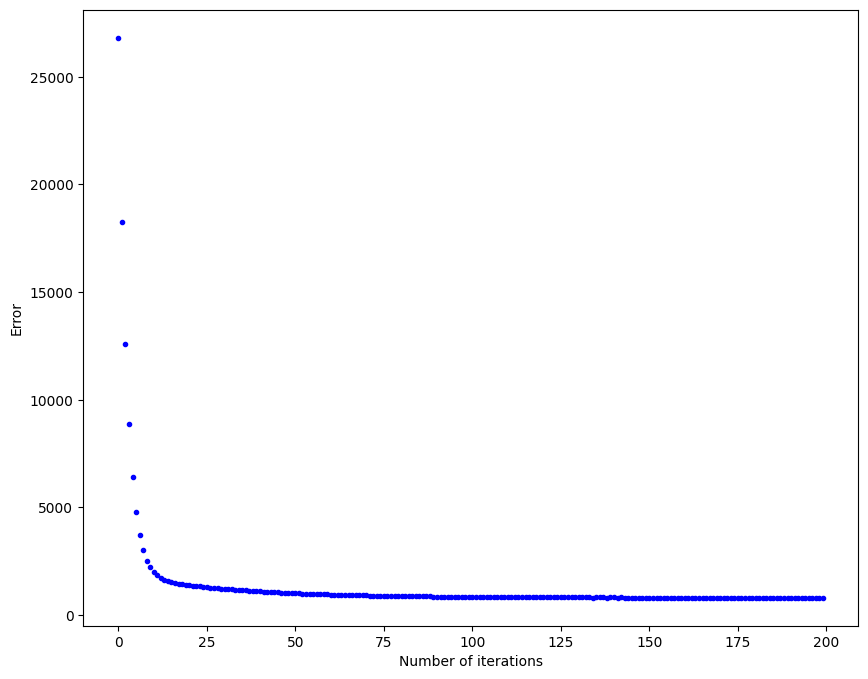

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

Question:1


Changing Batch Size in Mini-Batch Gradient Descent
Mini-batch gradient descent (MBGD) is a common optimization algorithm for training neural networks. It balances the slowness of full-batch gradient descent (using all data points at once) and the noisiness of stochastic gradient descent (using one data point at a time). MBGD uses smaller batches of data, providing a trade-off between speed and stability.

Here's how to change the batch size in MBGD with some explanation and code examples:

1. Understanding Batch Size:

Larger batches:
Reduce noise: Average gradients over more samples, leading to smoother optimization.
Faster convergence: More updates per epoch (iteration through all data), potentially reaching the minimum faster.
Higher memory consumption: Need to store and process larger data batches.
May get stuck in local minima: More prone to following gradients of shallow dips rather than the true minimum.
Smaller batches:
More noise: Gradients fluctuate more with fewer samples, potentially leading to erratic optimization.
Slower convergence: Need more epochs to reach the minimum.
Lower memory consumption: Suitable for resource-constrained environments.
Better escape from local minima: Noise can help jump out of shallow dips and explore better directions.
2. Changing Batch Size in Code:

The specific implementation for changing the batch size depends on the deep learning framework you're using. Here are some examples:

Tensor flow:

py Torch:

Simply changing the batch_size parameter in the code to your desired value will adjust the batch size used in mini-batch gradient descent during training.

Remember, larger batch sizes can lead to faster training but might require more memory, while smaller batch sizes might converge more slowly but could potentially provide better generalization. The choice of batch size often involves trade-offs and depends on the specific problem and available computational resources.








Question:2:

Experimenting with different batch sizes on real datasets can provide insights into how they affect the training process and the resulting model performance. Let's consider using three different batch sizes (small, medium, and large) on a real dataset for a classification task using Python's scikit-learn library.

We'll use the Iris dataset for this purpose, which contains samples of iris flowers with their respective species (setosa, versicolor, virginica).

Here's an example of how you might do this using scikit-learn:

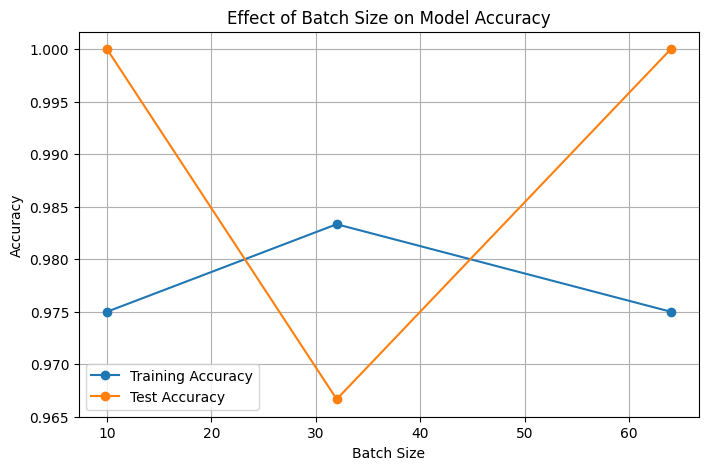

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define batch sizes to test
batch_sizes = [10, 32, 64]  # Small, medium, and large batch sizes

train_scores = []
test_scores = []

# Try different batch sizes
for batch_size in batch_sizes:
    # Create an MLPClassifier with a specific batch size
    model = MLPClassifier(batch_size=batch_size, max_iter=1000, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Calculate accuracy on training set
    train_score = model.score(X_train, y_train)
    train_scores.append(train_score)

    # Calculate accuracy on test set
    test_score = model.score(X_test, y_test)
    test_scores.append(test_score)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(batch_sizes, train_scores, marker='o', label='Training Accuracy')
plt.plot(batch_sizes, test_scores, marker='o', label='Test Accuracy')
plt.title('Effect of Batch Size on Model Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


This code uses a Multi-Layer Perceptron (MLP) classifier from scikit-learn and tests three different batch sizes: 10, 32, and 64. It measures the training and test accuracy for each batch size and plots the results.

By running this code, you can observe how different batch sizes affect the training and test accuracies on the Iris dataset. This can help you understand the impact of batch size on model performance for this specific classification task.








Question:3:

Certainly! Changing the learning rate in various gradient descent optimization algorithms—Batch Gradient Descent (BGD), Stochastic Gradient Descent (SGD), and Mini-batch Gradient Descent—can have distinct effects on the convergence and performance of the models. Let's consider adjusting the learning rate by the same factor across these three methods on a simple linear regression problem to observe their behaviors.

Here's an example of how you might compare the effects:

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data for a simple linear regression problem
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Adding bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Function for Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate, epochs):
    theta = np.random.randn(2, 1)  # Random initialization of parameters
    for epoch in range(epochs):
        gradients = 2/len(X) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Function for Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate, epochs):
    theta = np.random.randn(2, 1)  # Random initialization of parameters
    for epoch in range(epochs):
        for i in range(len(X)):
            random_index = np.random.randint(len(X))
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Function for Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate, epochs, batch_size):
    theta = np.random.randn(2, 1)  # Random initialization of parameters
    for epoch in range(epochs):
        for i in range(0, len(X), batch_size):
            xi = X[i:i+batch_size]
            yi = y[i:i+batch_size]
            gradients = 2/len(xi) * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Training models with different gradient descent methods and learning rates
learning_rate = 0.01
epochs = 50
batch_size = 10

# Batch Gradient Descent
theta_batch = batch_gradient_descent(X_b, y, learning_rate, epochs)

# Stochastic Gradient Descent
theta_stochastic = stochastic_gradient_descent(X_b, y, learning_rate, epochs)

# Mini-batch Gradient Descent
theta_mini_batch = mini_batch_gradient_descent(X_b, y, learning_rate, epochs, batch_size)

print("Batch GD Theta:", theta_batch.ravel())
print("SGD Theta:", theta_stochastic.ravel())
print("Mini-batch GD Theta:", theta_mini_batch.ravel())


Batch GD Theta: [2.47136752 3.69961069]
SGD Theta: [4.1190865 2.6599911]
Mini-batch GD Theta: [4.05210861 2.92915698]


This code creates synthetic linear data and implements Batch Gradient Descent, Stochastic Gradient Descent, and Mini-batch Gradient Descent. By adjusting the learning rate by the same factor in each method, you can compare their resulting parameter values (theta) and the convergence behavior.

By examining the theta values and observing the convergence behavior (how fast the algorithms reach an optimal solution), you can compare the effects of changing the learning rate by the same amount across these three gradient descent methods. Adjusting the learning rate might affect convergence speed, stability, and the final solution reached by each method.






